Assignment 7
1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

7. Isolate all the categorical column names into a list named ‘categorical’.

8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import seaborn as sns, warnings
warnings.filterwarnings('ignore')

Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

In [3]:
ins= pd.read_csv("insurance.csv")

Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

In [4]:
print(ins.shape)

(1338, 7)


In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Considering the target column is continous in nature, a regression approach is requred in conducting predictive analysis on the data.

Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

In [28]:
age_range = []
for age in range (10,70,10):
    age_range.append('{0} - {1}'.format(age, age + 9.0))

ins['age_range'] = pd.cut(x = ins['age'], bins = 6, labels = age_range)
ins

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,9639.39525,27.900,9644.2525,29330.98315,9328.07150,16884.92400,10 - 19.0
1,18,9391.34600,33.770,8539.6710,7345.40530,9768.88825,1725.55230,10 - 19.0
2,28,9391.34600,33.000,10977.2063,7345.40530,9768.88825,4449.46200,20 - 29.0
3,33,9391.34600,22.705,9644.2525,7345.40530,9301.89355,21984.47061,20 - 29.0
5,31,9639.39525,25.740,9644.2525,7345.40530,9768.88825,3756.62160,20 - 29.0
...,...,...,...,...,...,...,...,...
1330,57,9639.39525,25.740,9954.0544,7345.40530,9768.88825,12629.16560,60 - 69.0
1331,23,9639.39525,33.400,9644.2525,7345.40530,9328.07150,10795.93733,10 - 19.0
1332,52,9639.39525,44.700,10977.2063,7345.40530,9328.07150,11411.68500,50 - 59.0
1335,18,9639.39525,36.850,9644.2525,7345.40530,9768.88825,1629.83350,10 - 19.0


In [29]:
age_range_hist = ins['age_range']
age_hist = pd.DataFrame(age_range_hist).value_counts().reset_index()
age_hist.columns = ['age_range','count']
age_hist

,age_range,count
0,10 - 19.0,225
1,50 - 59.0,159
2,20 - 29.0,150
3,40 - 49.0,149
4,30 - 39.0,148
5,60 - 69.0,140


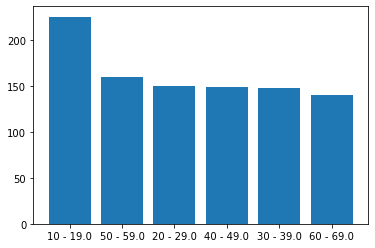

In [30]:
plt.bar(age_hist['age_range'], age_hist['count'])
plt.show()

the data contained a majority of individuals between the age 10-19 followed by those between 50-59 and the least were btween 60 and 69

Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

In [11]:
numerical_continuous = []
for column in ins.columns:
    if ins[column].dtypes != 'object':
        if ins[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove('charges')
numerical_continuous

['age', 'bmi']

In [12]:
numerical_discrete = []
for column in ins.columns:
    if ins[column].dtypes != 'object':
        if ins[column].nunique() < 10:
            numerical_discrete.append(column)
numerical_discrete

['children']

Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

<AxesSubplot:>

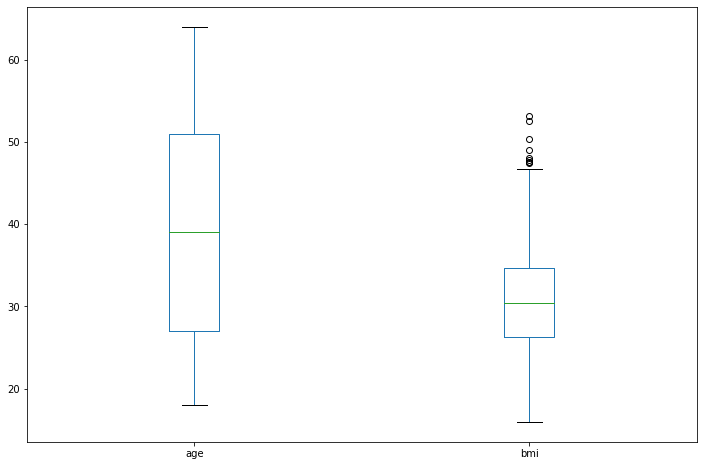

In [13]:
ins[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method

In [9]:
ins = ins.drop_duplicates()
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

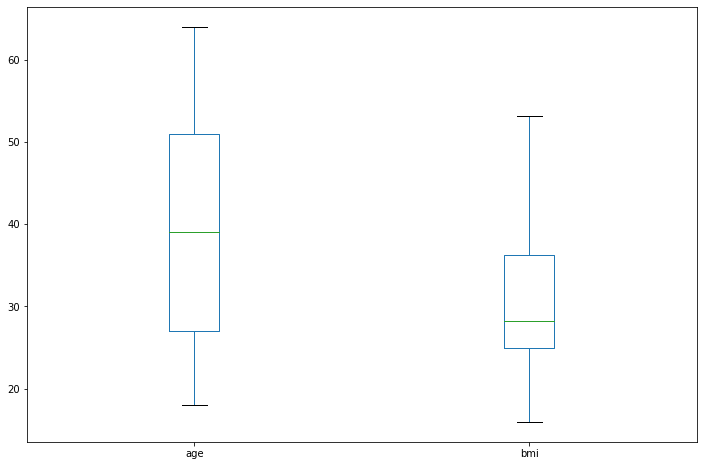

In [15]:
from scipy import stats
threshold = 0.3705
zscore = np.abs(stats.zscore(ins[['bmi']]))
ins[(zscore > threshold).all(axis=1)][numerical_continuous].plot(kind = 'box', figsize = (12, 8))

Isolate all the categorical column names into a list named ‘categorical’.

In [17]:
ins= ins[(zscore > threshold).all(axis = 1)]

In [18]:
categorical = []
for column in ins.columns:
    if ins[column].dtypes == 'object':
        categorical.append(column)
categorical

['sex', 'smoker', 'region']

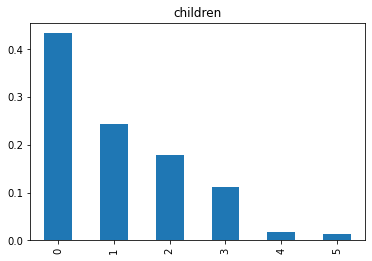

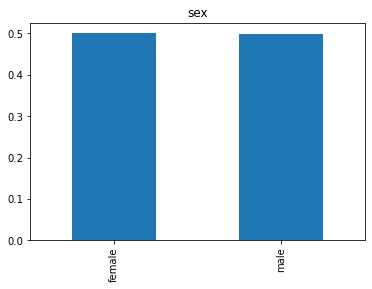

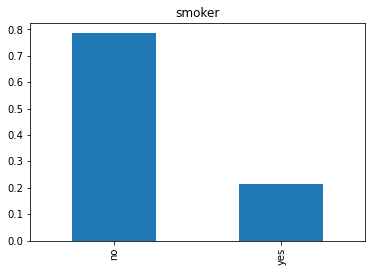

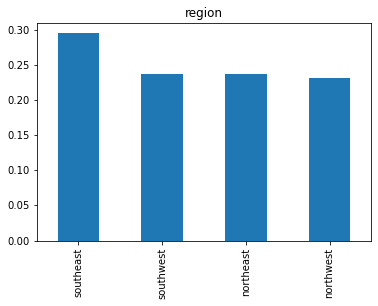

In [19]:
import matplotlib.pyplot as plt
for column in numerical_discrete + categorical:
    (ins[column].value_counts()/ins[column].shape[0]).plot(kind = 'bar')
    plt.title(column)
    plt.show()

Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

In [20]:
ins['children'] = ins['children'].replace([3, 4, 5], 'Rare')

Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [21]:
#mode
#mean
#median

encoded_features = {}
for column in numerical_discrete + categorical:
    encoded_features[column] = ins.groupby([column])['charges'].median().to_dict()
    ins[column] = ins[column].map(encoded_features[column])

In [22]:
encoded_features

{'children': {0: 9644.2525, 1: 8539.671, 2: 9954.0544, 'Rare': 10977.2063},
 'sex': {'female': 9639.395250000001, 'male': 9391.346},
 'smoker': {'no': 7345.4053, 'yes': 29330.98315},
 'region': {'northeast': 9661.16525,
  'northwest': 9301.89355,
  'southeast': 9768.88825,
  'southwest': 9328.071499999998}}

Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [26]:
X = ins.drop('charges', axis = 1)
y = ins['charges']
X

,age,sex,bmi,children,smoker,region
0,19,9639.39525,27.900,9644.2525,29330.98315,9328.07150
1,18,9391.34600,33.770,8539.6710,7345.40530,9768.88825
2,28,9391.34600,33.000,10977.2063,7345.40530,9768.88825
3,33,9391.34600,22.705,9644.2525,7345.40530,9301.89355
5,31,9639.39525,25.740,9644.2525,7345.40530,9768.88825
...,...,...,...,...,...,...
1330,57,9639.39525,25.740,9954.0544,7345.40530,9768.88825
1331,23,9639.39525,33.400,9644.2525,7345.40530,9328.07150
1332,52,9639.39525,44.700,10977.2063,7345.40530,9328.07150
1335,18,9639.39525,36.850,9644.2525,7345.40530,9768.88825


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 5)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age          True
sex          True
bmi          True
children    False
smoker       True
region       True
dtype: bool


The column children had to be dropped according to the RFE. This could have been as a result of the combined rare levels analysis that could have compromised the integrity of the feature.